In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy.io import loadmat


In [37]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

#all_responses=flatten_extend(all_responses)


In [49]:
# Load data loadmat
data = loadmat('data/684717_av_v_fle_2024-10-08_21h13.54.232.mat')
   
# Zip the arrays to the shortest length
zipped_data = list(zip(data["responses"], data["responseTimes"], data["incidentTimesAimed"], data["audioDelaysAimed"], data["visualDelaysAimed"], data["trialDurations"], data["audioTime"], data["flashTime"], data["trialNum"]))
# Unzip the data back into individual lists
all_responses, responseTimes, incidentTimes, audioDelays, visualDelays, trial_durs, audioTime, flashTime, trialNum = map(list, zip(*zipped_data))
df = pd.DataFrame({
    'responses': flatten_extend(all_responses),
    'responseTimes': flatten_extend(responseTimes),
    'incidentTimesAimed': flatten_extend(incidentTimes),
    'audioDelaysAimed': flatten_extend(audioDelays),
    'visualDelaysAimed': flatten_extend(visualDelays),
    'trialDurations': flatten_extend(trial_durs),
    'audioTime': flatten_extend(audioTime),
    'flashTime': flatten_extend(flashTime),
    'trialNum': flatten_extend(trialNum)
})

In [50]:
df

,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,trialDurations,audioTime,flashTime,trialNum
0,0,0.160945,0.898030,-3,0,1.278067,0.796902,0.846695,1
1,0,0.028249,0.746615,-3,4,1.278067,0.648956,0.765922,2
2,0,0.278206,0.822296,3,0,1.278067,0.831932,0.781609,3
3,0,0.227169,0.889605,3,0,1.278067,0.898074,0.848582,4
4,0,0.342806,0.797236,0,2,1.278067,0.747179,0.781750,5
...,...,...,...,...,...,...,...,...,...
245,0,0.227872,0.488777,1,-2,1.278067,0.464624,0.414860,246
246,0,0.612242,0.582869,1,-4,1.278067,0.548149,0.464727,247
247,0,0.362051,0.794012,-3,-2,1.278067,0.697355,0.714397,248
248,0,0.194335,0.671313,3,4,1.278067,0.680641,0.697605,249


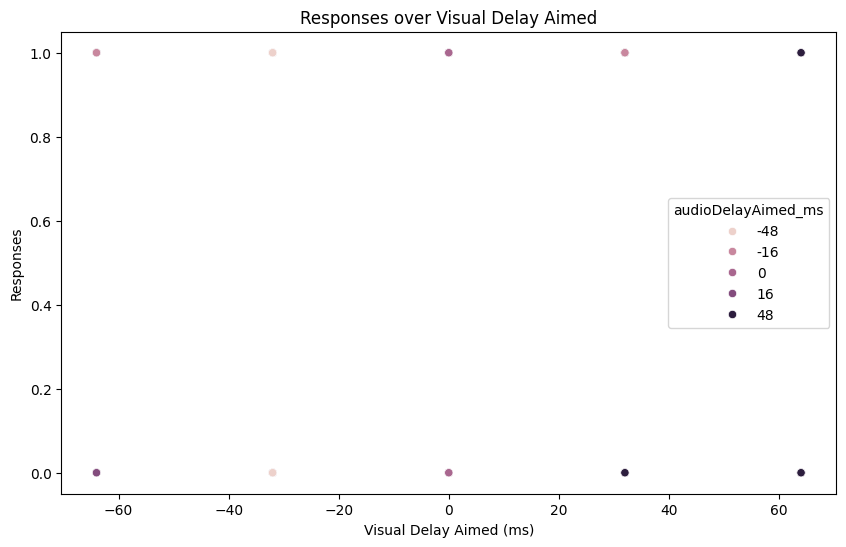

In [51]:
# Df includes responses, responseTimes, incidentTimesAimed, audioDelaysAimed, visualDelaysAimed, trialDurations, audioTime, flashTime, trialNum
# Responses are the key variable of interest
# audioDelaysAimed and visualDelaysAimed are the delays between the incident time of stimuli in terms of frames +1 means 16ms delay

# we need to plot the responses over VisualDelayAimed but we also need to consider the audioDelayAimed
# So that on X axis we have the visualDelayAimed and on Y axis we have the responses and the audioDelayAimed is represented by the color of the points

import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column that will represent the audioDelayAimed in terms of ms
df['audioDelayAimed_ms'] = df['audioDelaysAimed']*16
df['visualDelayAimed_ms'] = df['visualDelaysAimed']*16

# compute audioDelay Relative to Visual timing

df["relative_AV_delay_ms"]=df['audioDelayAimed_ms']-df['visualDelayAimed_ms']

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms', y='responses', hue='audioDelayAimed_ms', data=df)
plt.xlabel('Visual Delay Aimed (ms)')
plt.ylabel('Responses')
plt.title('Responses over Visual Delay Aimed')
plt.show()


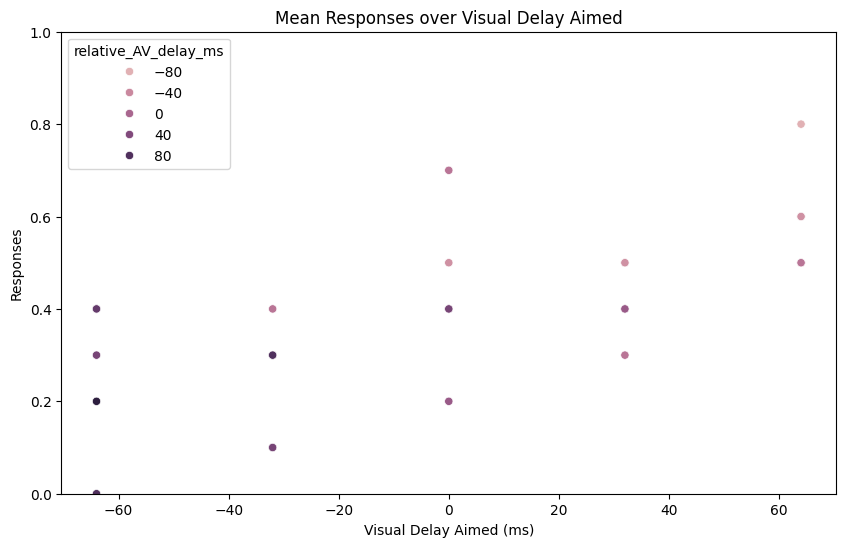

In [58]:

# now plot the mean responses for each visual delay aimed and audio delay aimed
# Group the data by visualDelayAimed and audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby(['visualDelayAimed_ms', 'relative_AV_delay_ms']).mean().reset_index()
grouped_data



# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms', y='responses', hue='relative_AV_delay_ms', data=grouped_data)
plt.xlabel('Visual Delay Aimed (ms)')
plt.ylabel('Responses')
plt.ylim(0, 1)
plt.title('Mean Responses over Visual Delay Aimed')
plt.show()
# The plot s hows that the responses are higher when the visual delay aimed is around 0ms and the audio delay aimed is around 0ms as well.

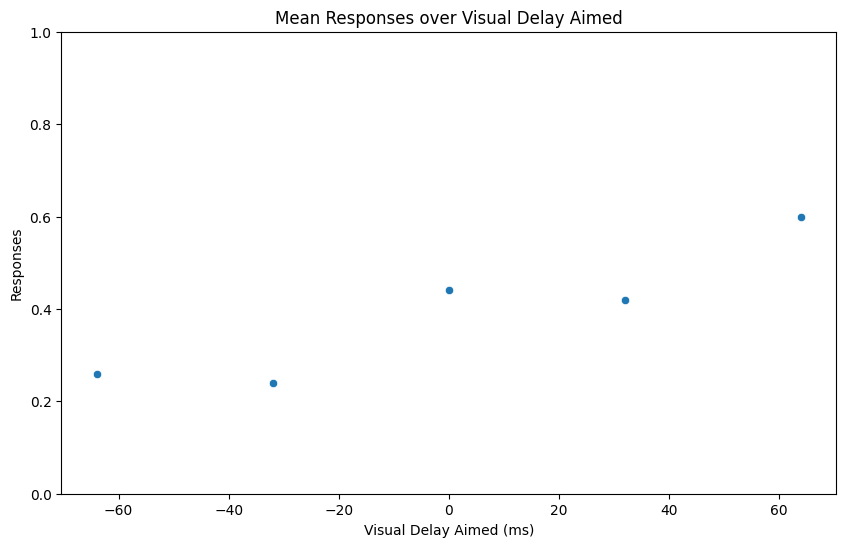

In [55]:
# Now plot only the mean responses for each visual delay aimed
# Group the data by visualDelayAimed and calculate the mean of responses
grouped_data = df.groupby('visualDelayAimed_ms').mean().reset_index()
grouped_data

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms', y='responses', data=grouped_data)
plt.xlabel('Visual Delay Aimed (ms)')
plt.ylabel('Responses')
plt.title('Mean Responses over Visual Delay Aimed')
plt.ylim(0,1)
plt.show()



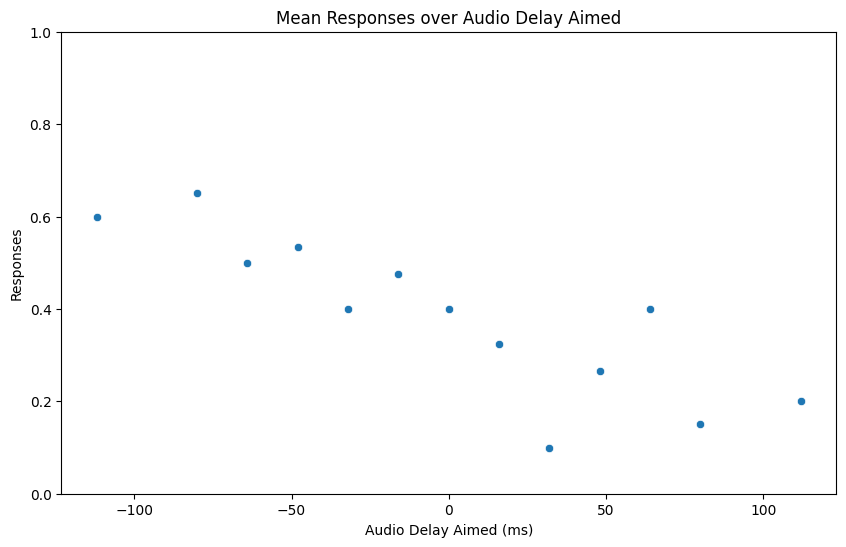

In [57]:
# Now plot the mean responses for only audio delay aimed
# Group the data by audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby('relative_AV_delay_ms').mean().reset_index()
grouped_data
 
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='relative_AV_delay_ms', y='responses', data=grouped_data)
plt.xlabel('Audio Delay Aimed (ms)')
plt.ylabel('Responses')
plt.title('Mean Responses over Audio Delay Aimed')
plt.ylim(0,1)
plt.show()



In [11]:
# Importing the last dataset on from data folder

# files on data folder by date and only the .csv files
  files = os.listdir('data/')
files = [f for f in files if f.endswith('.csv')]
fi les.sort()
fi les[0]

# import as pd dataframe
df =  pd.read_csv('data/' + files[0])
    

,Unnamed: 0,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,audioTime,flashTime,trialNum
0,0,0,0.601661,0.971133,0,1,0.931917,0.898045,0
1,1,0,0.884562,0.924655,-2,-4,0.979661,0.946540,1
2,2,0,1.651274,0.398859,4,2,0.431497,0.380744,2
